In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [15]:
#Import the image 
img = cv2.imread('ronaldo.jpg')
img

array([[[  6,   7,  11],
        [  6,   9,  13],
        [  8,  11,  16],
        ...,
        [ 97,  80,  83],
        [ 96,  82,  86],
        [ 98,  87,  90]],

       [[  6,   7,  11],
        [  5,   8,  12],
        [  8,  11,  16],
        ...,
        [101,  84,  87],
        [100,  86,  90],
        [102,  91,  93]],

       [[  5,   6,  10],
        [  5,   8,  12],
        [  7,  10,  15],
        ...,
        [102,  88,  89],
        [101,  90,  92],
        [103,  95,  96]],

       ...,

       [[ 26,  79,  59],
        [ 27,  80,  60],
        [ 27,  80,  60],
        ...,
        [ 15,   9,   4],
        [ 15,   9,   4],
        [ 15,   9,   4]],

       [[ 29,  85,  64],
        [ 29,  85,  64],
        [ 30,  86,  65],
        ...,
        [ 16,  13,   5],
        [ 16,  13,   5],
        [ 15,  12,   4]],

       [[ 32,  90,  66],
        [ 32,  90,  66],
        [ 33,  91,  67],
        ...,
        [ 18,  15,   7],
        [ 17,  14,   6],
        [ 17,  14,   6]]

In [16]:
#Since the image is having an array  of 3 dimensions fit_transform() does not work
from skimage import color
img1 = color.rgb2gray(img)
img1.shape

(350, 590)

In [17]:
#2-d Array
img1

array([[0.02774863, 0.0339251 , 0.04205098, ..., 0.32874039, 0.33436627,
        0.35119137],
       [0.02774863, 0.03000353, 0.04205098, ..., 0.34442667, 0.35005255,
        0.3665949 ],
       [0.02382706, 0.03000353, 0.03812941, ..., 0.35704745, 0.36267333,
        0.37949843],
       ...,
       [0.25998235, 0.26390392, 0.26390392, ..., 0.03888039, 0.03888039,
        0.03888039],
       [0.28072902, 0.28072902, 0.28465059, ..., 0.05121843, 0.05121843,
        0.04729686],
       [0.29782196, 0.29782196, 0.30174353, ..., 0.05906157, 0.05514   ,
        0.05514   ]])

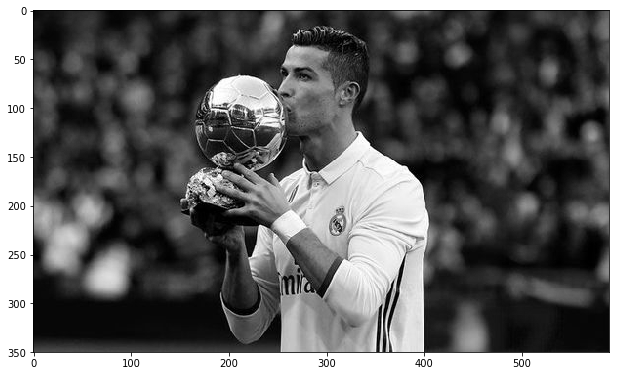

In [18]:
#Display the image
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.imshow(img1, cmap = 'gray', interpolation = 'nearest')


In [19]:
#Make instance of PCA with reqd components
pca_img = PCA(n_components=63)

In [20]:
#Reduce the dimensionality of your data
lower_dimensional_data = pca_img.fit_transform(img1)

In [21]:
#Check if no of components are reduced
print(lower_dimensional_data.shape)

(350, 63)


In [22]:
lower_dimensional_data

array([[-2.72454854e+00, -1.99299658e+00,  1.76685896e-01, ...,
        -3.26164965e-02, -1.76079899e-02,  7.02969577e-02],
       [-2.89963131e+00, -1.91165158e+00,  1.91859722e-01, ...,
        -2.72374893e-02, -6.41377673e-03,  6.61576048e-02],
       [-3.13196286e+00, -1.80506215e+00,  2.22272401e-01, ...,
        -3.27944051e-02, -2.12111991e-03,  5.26239761e-02],
       ...,
       [ 2.12667005e+00, -1.82997980e+00, -1.20777789e+00, ...,
         3.04040441e-02, -9.96715709e-02, -1.62470362e-02],
       [ 2.16047469e+00, -1.57551630e+00, -1.20567472e+00, ...,
         4.53718071e-02, -1.10174358e-01, -2.94082310e-03],
       [ 2.19930900e+00, -1.35215701e+00, -1.22901449e+00, ...,
         5.61479556e-02, -1.26576045e-01,  1.20202105e-03]])

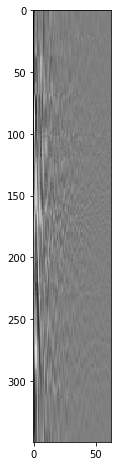

In [23]:
#Display the image
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.imshow(lower_dimensional_data, cmap = 'gray', interpolation = 'nearest')

In [24]:
#Convert back to normal using reduced components
approximation = pca_img.inverse_transform(lower_dimensional_data)
approximation

array([[0.0363894 , 0.04190416, 0.05051954, ..., 0.32751263, 0.33635072,
        0.35071231],
       [0.03473433, 0.04028824, 0.0491175 , ..., 0.33605192, 0.3441953 ,
        0.3579213 ],
       [0.03394538, 0.03911589, 0.04755582, ..., 0.34390945, 0.35125839,
        0.36417357],
       ...,
       [0.26072697, 0.26257753, 0.26520992, ..., 0.03872582, 0.037456  ,
        0.03836275],
       [0.27970406, 0.2815169 , 0.28392099, ..., 0.04553531, 0.04447045,
        0.04573978],
       [0.29700965, 0.29844392, 0.30026046, ..., 0.04977281, 0.04848713,
        0.04971312]])

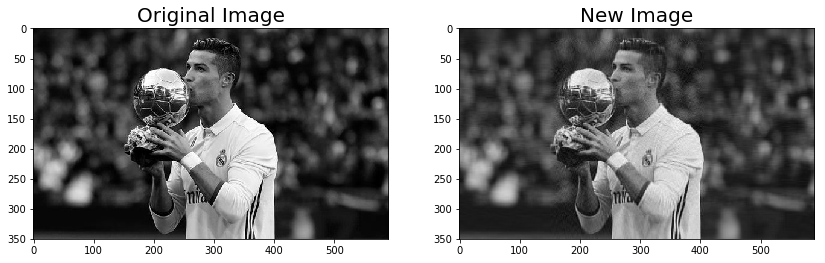

In [25]:
plt.figure(figsize=(14,14));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(img1, cmap = 'gray', interpolation = 'nearest')
#plt.xlabel('630 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 63 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation, cmap = 'gray' , interpolation = 'nearest')
#plt.xlabel('63 components', fontsize = 14)
plt.title('New Image', fontsize = 20);